4 Coordinate Model

In [259]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [260]:
# get the main paths
df = pd.read_csv('../simulations/data/small_trajectories.csv')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      104 non-null    int64  
 1   name                            104 non-null    object 
 2   latitude_1                      104 non-null    float64
 3   longitude_1                     104 non-null    float64
 4   altitude_relative_to_ground_1   104 non-null    float64
 5   latitude_2                      104 non-null    float64
 6   longitude_2                     104 non-null    float64
 7   altitude_relative_to_ground_2   104 non-null    float64
 8   latitude_3                      104 non-null    float64
 9   longitude_3                     104 non-null    float64
 10  altitude_relative_to_ground_3   104 non-null    float64
 11  latitude_4                      104 non-null    float64
 12  longitude_4                     104 

In [262]:
df.head()

,Unnamed: 0,name,latitude_1,longitude_1,altitude_relative_to_ground_1,latitude_2,longitude_2,altitude_relative_to_ground_2,latitude_3,longitude_3,...,latitude_18,longitude_18,altitude_relative_to_ground_18,latitude_19,longitude_19,altitude_relative_to_ground_19,latitude_20,longitude_20,altitude_relative_to_ground_20,enter-parking
0,0,1_A_Missed,36.109640,-115.140945,0.0,36.109676,-115.140893,0.0,36.109710,-115.140870,...,36.110660,-115.140983,0.0,36.110684,-115.141025,0.0,36.110713,-115.141055,0.0,0
1,1,2_A_Missed,36.109705,-115.140733,0.0,36.109702,-115.140785,0.0,36.109699,-115.140841,...,36.110548,-115.141190,0.0,36.110591,-115.141199,0.0,36.110651,-115.141182,0.0,0
2,2,3_A_Missed,36.109626,-115.140134,0.0,36.109675,-115.140140,0.0,36.109724,-115.140166,...,36.110686,-115.140910,0.0,36.110808,-115.140852,0.0,36.111009,-115.140862,0.0,0
3,3,4_A_Missed,36.109592,-115.140132,0.0,36.109662,-115.140159,0.0,36.109716,-115.140219,...,36.110981,-115.140853,0.0,36.111165,-115.140856,0.0,36.111302,-115.140917,0.0,0
4,4,5_A_Missed,36.109642,-115.141901,0.0,36.109649,-115.141793,0.0,36.109654,-115.141658,...,36.110958,-115.140852,0.0,36.111102,-115.140854,0.0,36.111243,-115.140892,0.0,0


In [263]:
# Split up
def split_data(amount, data):
    """
    Splits the columns of the data and returns a new data frame
    Args:
        amount:

    Returns:

    """
    # Create dataframe columns first
    columns = []
    for index in range(1, amount + 1):
        latitude = 'latitude_' + str(index)
        longitude = 'longitude_' + str(index)
        altitude = 'altitude_relative_to_ground_' + str(index)
        columns.append(latitude)
        columns.append(longitude)
        columns.append(altitude)

    columns.append('enter-parking')

    coord1 = data[data.columns[2:14]].values
    coord1 = np.column_stack((coord1, data['enter-parking'].values))

    coord2 = data[data.columns[14:26]].values
    coord2 = np.column_stack((coord2, data['enter-parking'].values))

    coord3 = data[data.columns[26:38]].values
    coord3 = np.column_stack((coord3, data['enter-parking'].values))

    coord4 = data[data.columns[38:50]].values
    coord4 = np.column_stack((coord4, data['enter-parking'].values))

    coord5 = data[data.columns[50:62]].values
    coord5 = np.column_stack((coord5, data['enter-parking'].values))

    all_coords = np.concatenate((coord1, coord2, coord3, coord4, coord5), axis=0)

    new_data = pd.DataFrame(all_coords, columns=columns)

    new_data = new_data.astype({'enter-parking': np.int})

    return new_data

# new_df = split_data(4, df)

In [264]:
# Get The cordinates for x
x = df[df.columns[2:14]]

# Get the last coordinate
y = df['enter-parking'].values

In [265]:
print(x)
print(y)

     latitude_8  longitude_8  altitude_relative_to_ground_8  latitude_9  \
0     36.109996  -115.140890                            0.0   36.110087   
1     36.110061  -115.140881                            0.0   36.110117   
2     36.109916  -115.140381                            0.0   36.109991   
3     36.109898  -115.140502                            0.0   36.109977   
4     36.110034  -115.141372                            0.0   36.110138   
..          ...          ...                            ...         ...   
99    36.110967  -115.139059                            0.0   36.110901   
100   36.111491  -115.139541                            0.0   36.111427   
101   36.110140  -115.139324                            0.0   36.110186   
102   36.110012  -115.139241                            0.0   36.110095   
103   36.110261  -115.139293                            0.0   36.110344   

     longitude_9  altitude_relative_to_ground_9  latitude_10  longitude_10  \
0    -115.140907     

In [266]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=59)

In [267]:
# Scale data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [268]:
x_train.shape

(72, 12)

In [269]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# Model creation
model = Sequential()

# 6 neurons for input layer
model.add(Dense(12, activation='relu'))

model.add(Dense(6, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=0.001))

/home/mikey/PycharmProjects/smart-park/venv/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [270]:
model.fit(x=x_train,
          y=y_train,
          epochs=500,
          validation_data=(x_test, y_test),
          callbacks=early_stop)

Epoch 1/500
3/3 [==============================] - 1s 54ms/step - loss: 0.6825 - val_loss: 0.6549
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6807 - val_loss: 0.6539
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 0.6803 - val_loss: 0.6526
Epoch 4/500
3/3 [==============================] - 0s 11ms/step - loss: 0.6796 - val_loss: 0.6514
Epoch 5/500
3/3 [==============================] - 0s 12ms/step - loss: 0.6792 - val_loss: 0.6502
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6778 - val_loss: 0.6492
Epoch 7/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6773 - val_loss: 0.6482
Epoch 8/500
3/3 [==============================] - 0s 1

In [271]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

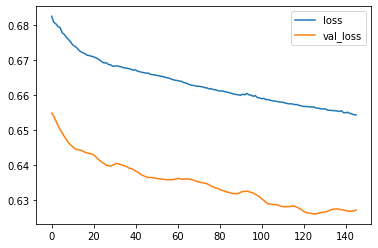

In [272]:
losses.plot()

In [273]:
test_df = pd.read_csv('../simulations/data/test_paths.csv')

In [274]:
test_x = test_df[test_df.columns[23:35]]

test_y = test_df['enter-parking'].values

In [275]:
print(test_x)

print(test_y)

    latitude_8  longitude_8  altitude_relative_to_ground_8  latitude_9  \
0    36.110041  -115.140870                            0.0   36.110092   
1    36.110038  -115.140415                            0.0   36.110073   
2    36.110100  -115.140915                            0.0   36.110186   
3    36.110127  -115.141243                            0.0   36.110148   
4    36.110074  -115.139307                            0.0   36.110129   
5    36.110194  -115.139266                            0.0   36.110245   
6    36.109980  -115.140798                            0.0   36.110029   
7    36.111008  -115.139515                            0.0   36.111076   
8    36.111842  -115.141521                            0.0   36.111840   
9    36.110157  -115.140513                            0.0   36.110201   
10   36.109958  -115.140882                            0.0   36.110032   
11   36.109916  -115.139202                            0.0   36.109967   
12   36.110088  -115.141302           

In [276]:
predictions = (model.predict(test_x) > 0.5).astype("int32")

print(predictions)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [277]:
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.60      1.00      0.75         9

    accuracy                           0.60        15
   macro avg       0.30      0.50      0.37        15
weighted avg       0.36      0.60      0.45        15



/home/mikey/PycharmProjects/smart-park/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mikey/PycharmProjects/smart-park/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mikey/PycharmProjects/smart-park/venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [278]:
print(confusion_matrix(test_y, predictions))

[[0 6]
 [0 9]]
